# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/bitcoin/"
btc_url = btc_url + "?format=json"
eth_url = "https://api.alternative.me/v2/ticker/ethereum/"
eth_url = eth_url + "?format=json"

In [5]:
btc_data = requests.get(btc_url)

In [6]:
eth_data = requests.get(eth_url)

In [7]:
btc_data_json = btc_data.json()
print(json.dumps(btc_data_json, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18526112,
            "total_supply": 18526112,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 13116.26,
                    "volume_24h": 19273559639,
                    "market_cap": 242956606046,
                    "percentage_change_1h": 0.0855973935203647,
                    "percentage_change_24h": 1.52743657921281,
                    "percentage_change_7d": 15.4009698587452,
                    "percent_change_1h": 0.0855973935203647,
                    "percent_change_24h": 1.52743657921281,
                    "percent_change_7d": 15.4009698587452
                }
            },
            "last_updated": 1603586826
        }
    },
    "metadata": {
        "timestamp": 1603586826,
        "num_cryp

In [8]:
eth_data_json = eth_data.json()
print(json.dumps(eth_data_json, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 113144863,
            "total_supply": 113144863,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 412.2,
                    "volume_24h": 9605496696,
                    "market_cap": 46617494447,
                    "percentage_change_1h": 0.0861828816688966,
                    "percentage_change_24h": 0.953986689253659,
                    "percentage_change_7d": 11.8138486657549,
                    "percent_change_1h": 0.0861828816688966,
                    "percent_change_24h": 0.953986689253659,
                    "percent_change_7d": 11.8138486657549
                }
            },
            "last_updated": 1603586823
        }
    },
    "metadata": {
        "timestamp": 1603586823,
        "num_cryp

In [9]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = btc_data_json["data"]["1"]["quotes"]["USD"]["price"]
btc_price
# Fetch current ETH price
# YOUR CODE HERE!]
eth_price = eth_data_json["data"]["1027"]["quotes"]["USD"]["price"]
eth_price
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15739.51
The current value of your 5.3 ETH is $2184.66


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Current amount of shares
# YOUR CODE HERE!
my_spy = 50
my_agg = 200
shares_data = {
    "shares": [50, 200]
}

tickers = ["SPY", "AGG"]
df_shares = pd.DataFrame(shares_data, index=tickers)
df_shares

shares
SPY      50
AGG     200

In [11]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [12]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-10-23", tz="America/New_York").isoformat()

# Set the tickers - already set above

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio


AGG                                     SPY  \
                            open    high    low   close   volume    open   
2020-10-23 00:00:00-04:00  117.3  117.52  117.3  117.47  3483335  345.93   

                                                             
                             high     low   close    volume  
2020-10-23 00:00:00-04:00  345.99  343.13  345.76  38762783

In [13]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.47
Current SPY closing price: $345.76


In [14]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17288.00
The current value of your 200 AGG shares is $23494.00


### Savings Health Analysis

In [15]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value


In [16]:
value_data = {
    "amount": [crypto, shares]
}
asset_classes = ["crypto", "shares"]
savings_df = pd.DataFrame(value_data, index=asset_classes)

In [17]:
# Display savings DataFrame
display(savings_df)

amount
crypto  17924.172
shares  40782.000

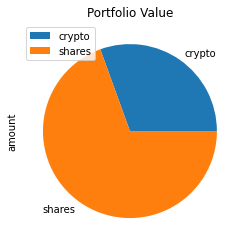

In [18]:
# Plot savings pie chart
# YOUR CODE HERE!
savings_df.plot.pie(y="amount", title="Portfolio Value")

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto + shares
total_savings

# Validate saving health
# YOUR CODE HERE!
if total_savings > (emergency_fund):
    print("Nice job, your emergency fund is more than sufficiently funded!")
elif total_savings == emergency_fund:
    print("Your emergency fund is adequate, keep up the good work!")
else:
    print("Start saving more! in case of emergencies!!")

Nice job, your emergency fund is more than sufficiently funded!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-23', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0  207.30   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0  206.20   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0  206.97   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003.0  208.34   

                                                              
                             high     low   close     volume  
2015-10-23 00:00:00-04:00  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  207.00  205.79  206.58   62899344  
2015-10-28 00:00:00-04:00  208.97  206.21  208.96  115482088  
2015-10-29 00:00:00-04:00  209.27  208.21  208.87   64052955

In [29]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [31]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30_year.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-23 00:00:00-04:00          NaN  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   
2015-10-29 00:00:00-04:00    -0.004287  208.34  209.27  208.21  208.87   

                                                   
                              volume daily_return  
2015-10-23 00:00:00-04:00  103135843          NaN  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521  
2015-10-29 00:00:00-04:00   64052955    -0.000431

In [32]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30_year.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.992127  0.996275  0.998380  0.998176  1.005115  0.997882  0.997557   
2     0.996182  0.994331  0.999170  0.994996  0.999000  0.995596  0.999370   
3     0.986088  0.991244  1.000212  0.992394  1.001778  0.984256  1.004888   
4     0.985176  0.993845  1.005371  0.991194  1.005364  0.966013  1.004876   
...        ...       ...       ...       ...       ...       ...       ...   
7556  4.648534  8.339682  4.714818  3.748300  3.855572  3.055375  4.600703   
7557  4.637268  8.334703  4.679161  3.745207  3.900081  3.045409  4.609405   
7558  4.616827  8.403947  4.685823  3.787143  3.860056  3.025963  4.608848   
7559  4.582855  8.413482  4.684523  3.846438  3.859171  2.999250  4.611408   
7560  4.548367  8.430166  4.702072  3.867450  3.883050  3.041493  4.565910   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.000165  0.994338  0.997431  ...  0.996405  0.997211  1.001078   
2     0.996677  0.997384  1.001426  ...  1.000785  0.995165  1.004373   
3     0.993123  0.991218  0.992375  ...  1.005256  0.989257  0.999442   
4     0.988843  0.987170  0.990758  ...  1.013132  0.992166  0.997755   
...        ...       ...       ...  ...       ...       ...       ...   
7556  1.993906  8.292336  3.376079  ...  3.401221  6.737277  6.955403   
7557  1.984377  8.292130  3.380349  ...  3.387883  6.715810  6.981829   
7558  1.986662  8.264870  3.394312  ...  3.393894  6.682566  6.927343   
7559  1.964591  8.280831  3.398054  ...  3.410623  6.690697  6.949896   
7560  1.963934  8.224396  3.387611  ...  3.391633  6.693991  6.987071   

           493       494        495       496       497       498       499  
0     1.000000  1.000000   1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.987905  1.003005   1.003057  0.994661  1.008692  0.997110  1.006983  
2     0.996929  1.006921   1.008386  0.994743  1.005242  0.995731  1.001434  
3     1.009315  1.011032   1.008578  0.992727  1.006214  0.994704  0.997342  
4     1.011240  1.011165   0.998707  0.988356  0.999206  0.998543  1.002369  
...        ...       ...        ...       ...       ...       ...       ...  
7556  6.921517  5.777113  11.649334  2.452895  5.852530  5.710471  6.406724  
7557  6.973371  5.812872  11.556366  2.470679  5.896335  5.703708  6.380180  
7558  6.962057  5.784626  11.572513  2.460585  5.878624  5.693199  6.350124  
7559  6.990838  5.874655  11.620074  2.457204  5.907915  5.756783  6.333276  
7560  6.935275  5.837502  11.725639  2.450943  5.843470  5.751454  6.290741  

[7561 rows x 500 columns]

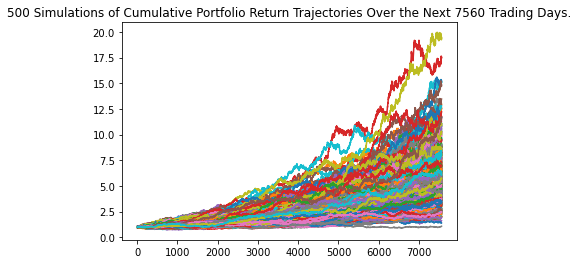

In [33]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_30_year.plot_simulation()
line_plot.get_figure().savefig("MC_30_year_sim_plot.png", bbox_inches="tight")

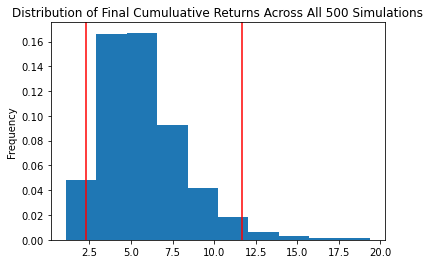

In [34]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_30_year.plot_distribution()
dist_plot.get_figure().savefig('MC_30_year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_30_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              5.718541
std               2.530979
min               1.076503
25%               3.871188
50%               5.294026
75%               7.001157
max              19.389982
95% CI Lower      2.276493
95% CI Upper     11.702249
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [37]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $45529.85 and $234044.98


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [38]:
# Set initial investment
initial_investment2 = initial_investment * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment2,2)
ci_upper = round(tbl[9]*initial_investment2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $68294.78 and $351067.47


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5_year_aggressive = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.90,.10],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [41]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5_year_aggressive.portfolio_data.head()
MC_5_year_aggressive.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.000516  1.003525  1.005840  0.996587  1.004430  0.998574  0.998542   
2     1.001551  1.002617  1.003505  0.996602  1.006925  0.998742  1.005472   
3     1.006872  1.003434  1.001148  0.995903  1.007129  0.989559  1.007211   
4     1.011944  1.003587  0.998807  0.999440  1.005304  0.990955  1.005008   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.293592  1.354323  0.997964  1.342225  1.259496  1.015912  1.141582   
1257  1.296506  1.353147  0.994853  1.342183  1.265787  1.011161  1.141898   
1258  1.301938  1.351174  0.993745  1.335184  1.266458  1.006945  1.136810   
1259  1.300886  1.357402  0.993103  1.337253  1.263112  1.008696  1.132164   
1260  1.306977  1.355819  0.992494  1.333277  1.264573  1.006666  1.132505   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.996581  0.998757  1.002236  ...  1.001562  0.995851  0.995172   
2     0.994189  0.992608  1.000942  ...  1.001412  0.996668  0.997336   
3     0.991143  0.992798  1.003733  ...  0.996281  0.997116  0.996193   
4     0.990634  0.990333  1.005395  ...  0.998783  0.995512  0.998656   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.086078  1.179876  0.971090  ...  0.957062  1.220542  1.289417   
1257  1.087911  1.177895  0.968459  ...  0.955624  1.217654  1.291176   
1258  1.083780  1.182713  0.967723  ...  0.946883  1.219500  1.291966   
1259  1.079569  1.182816  0.965692  ...  0.946497  1.217700  1.294912   
1260  1.081234  1.180033  0.967246  ...  0.942580  1.216934  1.296123   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.998160  0.997676  0.993941  1.003383  1.000422  0.991854  1.000702  
2     1.000363  0.999025  0.988252  1.001698  0.997847  0.985578  1.007560  
3     0.997433  0.997507  0.987990  0.999670  0.997686  0.986445  1.007633  
4     0.996799  0.996392  0.991422  0.994623  0.999845  0.984975  1.006108  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.244631  1.137440  1.115039  1.193551  1.250694  1.116109  0.971732  
1257  1.250146  1.138712  1.113995  1.192181  1.251029  1.114904  0.973683  
1258  1.246678  1.137812  1.115297  1.189229  1.254292  1.110809  0.970424  
1259  1.248533  1.138805  1.116596  1.194228  1.258232  1.113554  0.968503  
1260  1.244160  1.141867  1.116446  1.193582  1.264853  1.113461  0.962058  

[1261 rows x 500 columns]

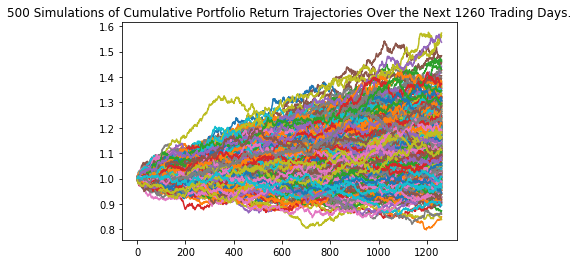

In [42]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_5_year_aggressive.plot_simulation()
line_plot.get_figure().savefig("MC_5_year_aggressive_sim_plot.png", bbox_inches="tight")

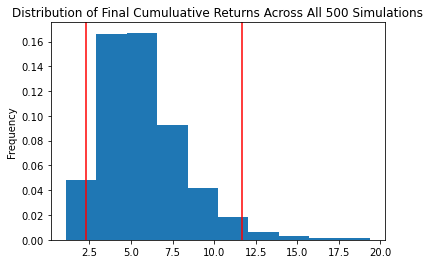

In [43]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_30_year.plot_distribution()
dist_plot.get_figure().savefig('MC_5_year_aggressive_dist_plot.png',bbox_inches='tight')

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_5_year_aggressive = MC_5_year_aggressive.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_5_year_aggressive)

count           500.000000
mean              1.139033
std               0.125652
min               0.838456
25%               1.051241
50%               1.132191
75%               1.214071
max               1.573224
95% CI Lower      0.916662
95% CI Upper      1.389400
Name: 1260, dtype: float64


In [47]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_5_year = 50000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8]*initial_investment_5_year,2)
ci_upper_five = round(tbl[9]*initial_investment_5_year,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5_year} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $113824.63 and $585112.46


### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")